- 작업그룹별 SPEC
- ROLLING_DESCALING 작업 횟수 별 HSB 적용여부에 따른 양품 여부

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:

df = pd.read_csv('steel_date.csv')

In [4]:
df['SPEC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 720 entries, 0 to 719
Series name: SPEC
Non-Null Count  Dtype 
--------------  ----- 
720 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [5]:
df.head()

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [6]:
steel = df.copy()

In [7]:
steel['SCALE'] = steel['SCALE'].replace({'양품':1, '불량':0})
steel['HSB'] = steel['HSB'].replace({'적용':1, '미적용':0})

In [8]:
steel.head(1)

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,1,8,2조


### 작업그룹별 SPEC

In [14]:
group01=steel.groupby(['WORK_GR','SPEC'], as_index=False)[['PLATE_NO']].count()
group01.head(5)

,WORK_GR,SPEC,PLATE_NO
0,1조,AB/A,3
1,1조,AB/EH36-TM,4
2,1조,API-2W-50T,1
3,1조,BV-AH32,4
4,1조,BV-AH32-TM,1


In [15]:
fig01 = px.bar(group01, x='WORK_GR', y='PLATE_NO', color='SPEC', title='작업 그룹별 SPEC cnt')
fig01.show()

- 2, 4조가 적은 양으로 많은 규격을 생산하는 것으로 보아 좀 더 전문성이 있는 그룹이라 판단할 수 있다.
- JS-SM490YB가 모든 조에서 많이 만들어내고 있으며 많이 쓰는 부품임을 알 수 있다.
- 또한 JS-SM490YB를 4조에서 가장 많이 생산하고 있어 1번 인사이트에 더해 4조가 가장 전문성 있는 그룹임을 추측해볼 수 있다.
- 1조에서는 생산하는 부품을 다른 조에 비해 많은 양을 생산하고 있어 전문성이 떨어지며 대량 생산을 하는 그룹임을 추측해볼 수 있다.
- 위의 정보들을 통해 4조가 가장 양품율이 높고 1조가 낮음을 추측할 수 있다.

### ROLLING_DESCALING 작업 횟수 별 HSB 적용에 따른 양품 여부

In [11]:
steel.head()

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,1,8,2조
1,1,PB562775,2008-08-01:00:00:16,1,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,122,1135,53,283,1135,937,1,8,2조
2,2,PB562776,2008-08-01:00:00:59,1,NV-E36-TM,T8,33.27,3619,19181,18130,...,1129,116,1121,55,282,1121,889,1,8,3조
3,3,PB562777,2008-08-01:00:01:24,1,NV-E36-TM,T8,33.27,3619,19181,18130,...,1152,125,1127,68,316,1127,885,1,8,3조
4,4,PB562778,2008-08-01:00:01:44,1,BV-EH36-TM,T8,38.33,3098,13334,12430,...,1140,134,1128,48,314,1128,873,1,8,1조


In [35]:
group02 = steel.groupby(['ROLLING_DESCALING','HSB','SCALE'], as_index=False).agg(count=('PLATE_NO','count'))
group02

,ROLLING_DESCALING,HSB,SCALE,count
0,5,1,0,5
1,6,0,0,9
2,6,1,0,17
3,6,1,1,150
4,7,1,0,15
5,8,0,0,6
6,8,1,0,93
7,8,1,1,109
8,9,1,0,20
9,10,0,0,18


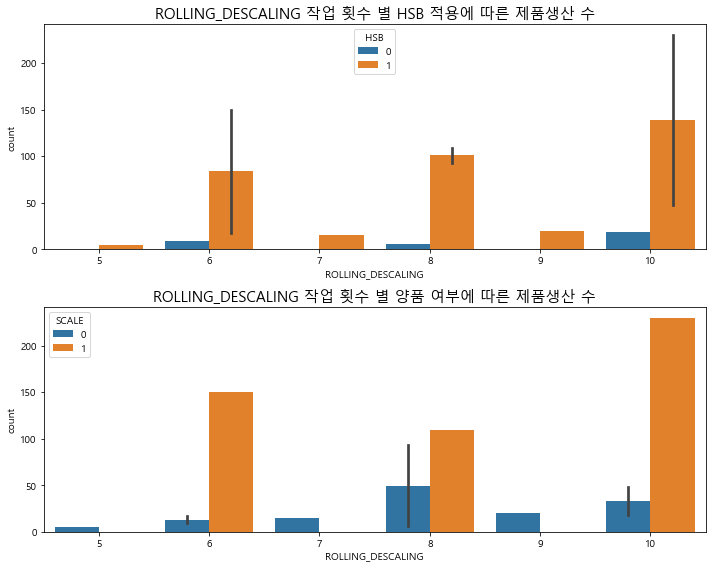

In [47]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.barplot(data=group02, x='ROLLING_DESCALING', y='count', hue='HSB', ax=ax1)
ax1.set_title('ROLLING_DESCALING 작업 횟수 별 HSB 적용에 따른 제품생산 수', fontsize=15)
sns.barplot(data=group02, x='ROLLING_DESCALING', y='count', hue='SCALE', ax=ax2)
ax2.set_title('ROLLING_DESCALING 작업 횟수 별 양품 여부에 따른 제품생산 수', fontsize=15)
fig.tight_layout()

- 1번 그래프를 통해 홀수번 횟수로는 ROLLING_DESCALING 작업을 거의 하지 않는 것을 알 수 있다.
- 2번 그래프를 통해 홀수번 ROLLING_DESCALING 작업 횟수를 실행하면 반드시 불량이 나오는 것을 알 수 있다.
- 1, 2번 그래프를 통해 ROLLING_DESCALING 작업 횟수를 10번으로 하는 것이 가장 좋고 여의치 않을 때는 6번 진행하면 되는 것을 알 수 있다.